# Plot just the tree

Used for the presentations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from momepy.datasets import get_path
import geopandas as gpd
import mapclassify
from matplotlib.transforms import Bbox
from matplotlib.lines import Line2D

from scipy.cluster.hierarchy import dendrogram, fcluster, set_link_color_palette

In [2]:
v = "v10"
lower_cut = 500  # the lowest level shown in tree - matched to labels in pmtiles
higher_cut = 1000  # level at which colors are assigned
model_params = "_post_processing_v1"

Read linkage matrix.

In [3]:
linkage_matrix = np.load(
    f"/data/uscuni-ulce/processed_data/clusters/complete_linkage_10_{v}.npy"
)

Code for circular dendrogram.

In [4]:
def smoothsegment(seg, Nsmooth=100):
    return np.concatenate([[seg[0]], np.linspace(seg[1], seg[2], Nsmooth), [seg[3]]])


def smoothline(seg, Nsmooth=100):
    return np.concatenate([[seg[0]], np.linspace(seg[1], seg[2], Nsmooth), [seg[3]]])

In [5]:
low = fcluster(linkage_matrix, lower_cut, criterion="distance")
high = fcluster(linkage_matrix, higher_cut, criterion="distance")

In [6]:
colors = [
    "#4069BC",
    "#7CBAE4",
    "#E69C63",
    "#eec1d5",
    "#E0665F",
    "#ECBF43",
    "#b2cd32",
    "#1F943E",
]
set_link_color_palette(colors)

In [9]:
names = [
    "Incoherent Large-Scale Homogenous Fabric",
    "Incoherent Large-Scale Heterogenous Fabric",
    "Incoherent Small-Scale Linear Fabric",
    "Incoherent Small-Scale Sparse Fabric",
    "Incoherent Small-Scale Compact Fabric",
    "Coherent Interconnected Fabric",
    "Coherent Dense Disjoint Fabric",
    "Coherent Dense Adjacent Fabric",
]

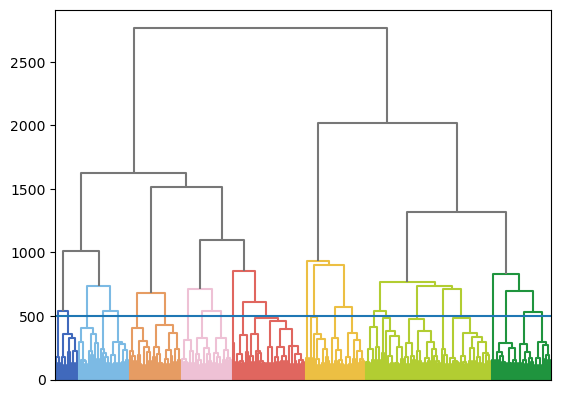

In [23]:
d = dendrogram(
    linkage_matrix,
    no_plot=False,
    truncate_mode="lastp",
    p=256,
    color_threshold=higher_cut,
    no_labels=True,
    above_threshold_color="#777",
)
plt.axhline(500)

In [24]:
icoord = np.array(d["icoord"])
dcoord = np.array(d["dcoord"])
gap = 0.043

dcoord = -dcoord
# avoid a wedge over the radial labels
imax = icoord.max()
imin = icoord.min()
icoord = ((icoord - imin) / (imax - imin) * (1 - gap) + gap / 2) * 2 * np.pi

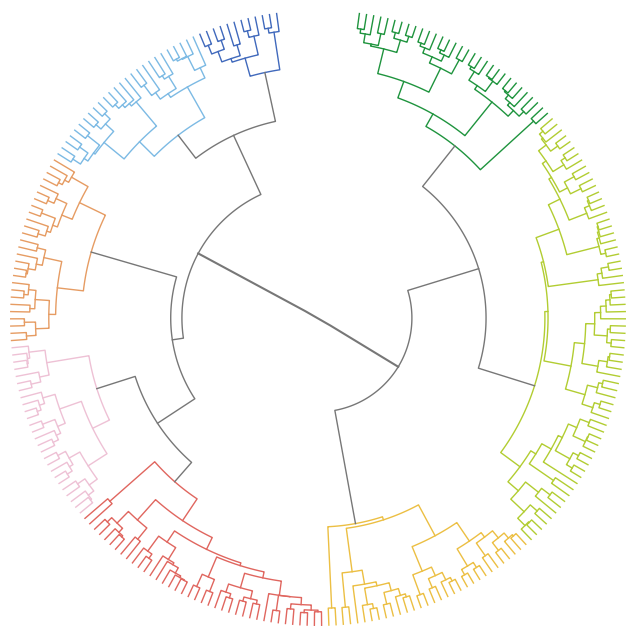

In [50]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

for xs, ys, color in zip(icoord[:-1], dcoord[:-1], d["color_list"][:-1]):
    xs = smoothsegment(xs)
    ys = smoothsegment(ys)
    ax.plot(xs, ys, color=color, linewidth=1)

ax.plot(icoord[-1], dcoord[-1], color=d["color_list"][-1])

ax.spines["polar"].set_visible(False)
ax.set_rlabel_position(0)
Nxticks = 10
xticks = np.linspace(gap / 2, 1 - gap / 2, Nxticks)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])

ax.grid(False, axis="x")
ax.set_theta_zero_location("N")

# ax.axhline(-200, color='r', linestyle='--', xmin=0.01, xmax=.99)
plt.savefig("../figs/tree_nocut.png", dpi=300, bbox_inches='tight')